In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Gold.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,1/2/2018
1,1318.375,1318.875,1321.300,1307.710,1/3/2018
2,1313.105,1327.875,1327.875,1306.050,1/4/2018
3,1322.050,1319.590,1323.505,1313.910,1/5/2018
4,1321.050,1320.980,1322.210,1315.105,1/8/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df.head(5)

,Open,Close,High,Low,Date
2114,2327.82,2327.82,2327.82,2327.82,2024-06-01
2113,2343.34,2327.82,2359.58,2320.63,2024-05-31
2112,2338.88,2343.38,2351.09,2323.03,2024-05-30
2111,2361.39,2339.11,2361.79,2335.07,2024-05-29
2110,2352.20,2361.31,2363.46,2340.42,2024-05-28


In [4]:
df1=df.reset_index()['Close']
df1

0       2327.820
1       2327.820
2       2343.380
3       2339.110
4       2361.310
          ...   
2110    1320.980
2111    1319.590
2112    1327.875
2113    1318.875
2114    1316.500
Name: Close, Length: 2115, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2411
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8679e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4067e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3979e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.8686e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6169e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7736e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.6084e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2372e-04
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1093e-04
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4989e-04
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0466e-04
Epoch 15/100
22/22 ━

In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, ytest)
print('Testing MAPE:', test_mape)

#MSE
test_mse = mean_squared_error(y_pred, ytest)
print('Testing MSE:', test_mse)

Testing RMSE: 1260.0088019660702
Testing MAPE: 0.9999171166454356
Testing MSE: 1587608.9908923572


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.11286785 0.1148217  0.1148217  0.11930476 0.11440216 0.11914494
 0.12511437 0.12083508 0.12866647 0.12866647 0.13728499 0.14000999
 0.13843972 0.13628609 0.13668565 0.13668565 0.12895015 0.14323444
 0.13326541 0.12964939 0.12696833 0.121814   0.12724803 0.12680851
 0.13168315 0.11724303 0.11724303 0.11723504 0.12057537 0.13632604
 0.14335031 0.13819598 0.13819598 0.12521027 0.12593747 0.10979123
 0.11435021 0.11166916 0.11166517 0.11371092 0.11961642 0.12141444
 0.11930476 0.1188173  0.11937669 0.11825792 0.12017581 0.13141944
 0.11685945 0.12017581 0.11857756 0.11431026 0.11657976 0.11546499
 0.12346019 0.12373189 0.12373189 0.12613725 0.11937669 0.12061532
 0.13855559 0.13695735 0.14247128 0.14844471 0.140905   0.12389971
 0.11874538 0.11358306 0.11358306 0.11160923 0.11546099 0.12029567
 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.120

In [16]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


0 day input [0.11286785 0.1148217  0.1148217  0.11930476 0.11440216 0.11914494
 0.12511437 0.12083508 0.12866647 0.12866647 0.13728499 0.14000999
 0.13843972 0.13628609 0.13668565 0.13668565 0.12895015 0.14323444
 0.13326541 0.12964939 0.12696833 0.121814   0.12724803 0.12680851
 0.13168315 0.11724303 0.11724303 0.11723504 0.12057537 0.13632604
 0.14335031 0.13819598 0.13819598 0.12521027 0.12593747 0.10979123
 0.11435021 0.11166916 0.11166517 0.11371092 0.11961642 0.12141444
 0.11930476 0.1188173  0.11937669 0.11825792 0.12017581 0.13141944
 0.11685945 0.12017581 0.11857756 0.11431026 0.11657976 0.11546499
 0.12346019 0.12373189 0.12373189 0.12613725 0.11937669 0.12061532
 0.13855559 0.13695735 0.14247128 0.14844471 0.140905   0.12389971
 0.11874538 0.11358306 0.11358306 0.11160923 0.11546099 0.12029567
 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.120

In [17]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


0 day input [0.11286785 0.1148217  0.1148217  0.11930476 0.11440216 0.11914494
 0.12511437 0.12083508 0.12866647 0.12866647 0.13728499 0.14000999
 0.13843972 0.13628609 0.13668565 0.13668565 0.12895015 0.14323444
 0.13326541 0.12964939 0.12696833 0.121814   0.12724803 0.12680851
 0.13168315 0.11724303 0.11724303 0.11723504 0.12057537 0.13632604
 0.14335031 0.13819598 0.13819598 0.12521027 0.12593747 0.10979123
 0.11435021 0.11166916 0.11166517 0.11371092 0.11961642 0.12141444
 0.11930476 0.1188173  0.11937669 0.11825792 0.12017581 0.13141944
 0.11685945 0.12017581 0.11857756 0.11431026 0.11657976 0.11546499
 0.12346019 0.12373189 0.12373189 0.12613725 0.11937669 0.12061532
 0.13855559 0.13695735 0.14247128 0.14844471 0.140905   0.12389971
 0.11874538 0.11358306 0.11358306 0.11160923 0.11546099 0.12029567
 0.1333613  0.12896614 0.12497053 0.12619718 0.13943862 0.13655779
 0.13153132 0.12986515 0.14205174 0.14205174 0.13855559 0.14734592
 0.1333613  0.12775147 0.12584957 0.12584957 0.120

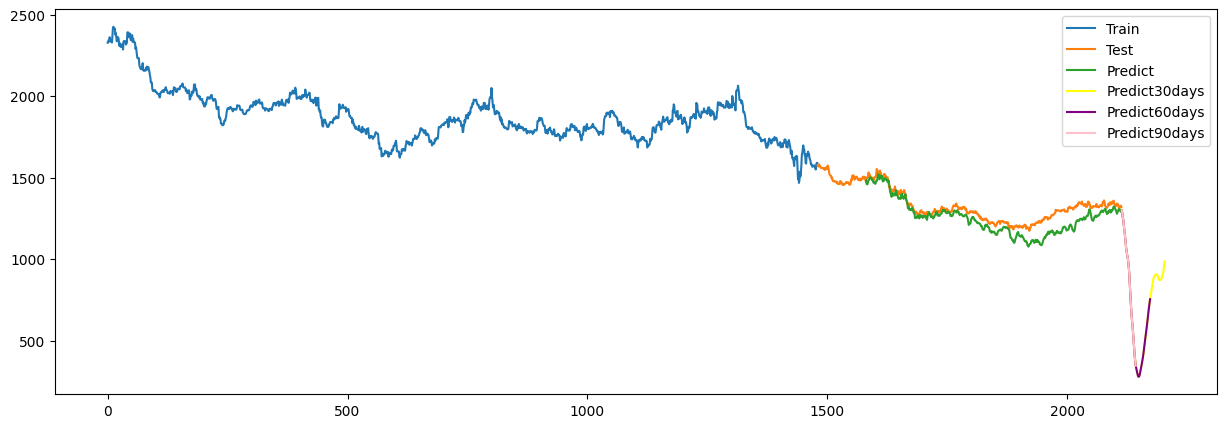

In [18]:
# 14.Vẽ hình
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_90days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_90days_data_index,scaler.inverse_transform(lst_output_90), color='yellow')

prediect_60days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_60days_data_index,scaler.inverse_transform(lst_output_60), color='purple')

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output), color='pink')

plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.show()